# Sentiment Analysis

In this lesson, we're going to learn how to use [VADER](https://github.com/cjhutto/vaderSentiment), an English-language sentiment analysis tool designed for use with social media texts. This tool helps to calculate whether texts express positive or negative sentiment.

In this lesson, we will learn how to use VADER to:
- Calculate sentiment for individual sentences, tweets, and a fairy tale
- Make plots of how sentiment fluctuates over time and throughout a text
---

## Datasets

### Trump's Tweets

[![](https://www.the-sun.com/wp-content/uploads/sites/6/2020/03/Screenshot-2020-03-25-at-21.56.11.png?strip=all&w=942)](https://www.the-sun.com/wp-content/uploads/sites/6/2020/03/Screenshot-2020-03-25-at-21.56.11.png?strip=all&w=942)

We're going to use VADER to analyze Donald Trump's tweets and plot the fluctuation of sentiment over time. The Trump tweets dataset is downloaded from [The Trump Twitter Archive](https://www.thetrumparchive.com/).

### Little Red Riding Hood
<blockquote class="epigraph" style=" padding: 10px">

"Grandmother,” she said, “what big ears you have!” 
    
“The better to hear you with, my Child"...


<p class ="attribution">
    —<a href="https://www.gutenberg.org/ebooks/2591">"Little Red-Cap," </a> Grimms' Fairy Tales
    </p>
    
</blockquote>


[![](https://www.publicdomainpictures.net/pictures/80000/nahled/little-red-riding-hood.jpg)](https://www.publicdomainpictures.net/pictures/80000/nahled/little-red-riding-hood.jpg)

We're also going to use VADER to analyze the story "Little Red-Cap" (commonly known as "Little Red Riding Hood") from Grimms' fairy tales. The story is downloaded from [Project Gutenberg](https://www.gutenberg.org/ebooks/2591).

## What is Sentiment? What Exactly Are We Measuring?

What is sentiment analysis, exactly? What are we actually measuring with VADER?

These are tough and important questions. According to VADER's creators, C.J. Hutto and Eric Gilbert, "Sentiment analysis, or opinion mining, is an active area of study in the field of natural language processing that analyzes people's **opinions, sentiments, evaluations, attitudes, and emotions** via the computational treatment of subjectivity in text" (["VADER"](https://www.aaai.org/ocs/index.php/ICWSM/ICWSM14/paper/view/8109/8122)).

I would like to emphasize that "opinions, sentiments, evaluations, attitudes, and emotions" covers a *lot* of ground. These are complex categories of human experience that can be expressed in many different ways, especially in different contexts. In fact, that's why Hutto and Gilbert designed VADER specifically for *social media* texts, because sentiment gets expressed differently in social media posts than in, say, fictional stories or newspaper articles.

We want to remain critical and self-reflexive about what exactly we are measuring with VADER — especially when we apply VADER to non-social media texts, as we will with "Little Red-Cap" below. Too often I have encountered well-meaning students who want to understand complex social or textual phenomena (e.g., mental health, a reader's emotional experience of a story, opinions about climate change) by reducing it only to sentiment analysis scores, without doing more and without thinking more deeply about whether those scores actually capture what they're interested in.

So, yes, tools like VADER can be useful, as we will see below, but they are only useful when thoughtfully and deliberately applied.

## How VADER Was Built and How It Works

VADER, which stands for **V**alence **A**ware **D**ictionary and s**E**ntiment **R**easoner, calculates the sentiment of texts by referring to a lexicon of words that have been assigned sentiment scores as well as by using a handful of simple rules.

You can read more about how VADER was designed in [C.J. Hutto and Eric Gilbert's published paper](https://www.aaai.org/ocs/index.php/ICWSM/ICWSM14/paper/view/8109/8122), but here's a summary version: VADER's lexicon was created by enlisting 10 different people to rate thousands of words positively or negatively on a scale of -4 to 4 (you can scroll through the [lexicon on GitHub](https://github.com/cjhutto/vaderSentiment/blob/master/vaderSentiment/vader_lexicon.txt) and check it out for yourself — each line consists of a word, the mean rating, standard deviation, and 10 individual human ratings).

[![](../../images/VADER-fig.png)](https://www.aaai.org/ocs/index.php/ICWSM/ICWSM14/paper/view/8109/8122)




*This figure shows the interface presented to the 10 raters for rating the sentiment of words. It is taken from ["VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text."](https://www.aaai.org/ocs/index.php/ICWSM/ICWSM14/paper/view/8109/8122)* 

For example, you can see that the acronym [ROFL](https://github.com/cjhutto/vaderSentiment/blob/d8da3e21374a57201b557a4c91ac4dc411a08fed/vaderSentiment/vader_lexicon.txt#L368) (Rolling on the Floor Laughing) has a mean rating of 2.7, the word [*crappy*](https://github.com/cjhutto/vaderSentiment/blob/d8da3e21374a57201b557a4c91ac4dc411a08fed/vaderSentiment/vader_lexicon.txt#L1622) has a mean rating of -2.5, and the word [*bliss*](https://github.com/cjhutto/vaderSentiment/blob/d8da3e21374a57201b557a4c91ac4dc411a08fed/vaderSentiment/vader_lexicon.txt#L1127) has a mean rating of 2.7. If you look at the 10 individual ratings for each entry, however, you can see interesting discrepancies. One person rated *bliss* as a 4, while another person rated *bliss* as a 1. Just how "positive" is the word *bliss*? What do *you* think?

What about [*cutesie*](https://github.com/cjhutto/vaderSentiment/blob/d8da3e21374a57201b557a4c91ac4dc411a08fed/vaderSentiment/vader_lexicon.txt#L1721)? It has a mean rating of 1, but two people rated it as a -1, and five people rated as a 2. Is *cutesie* an admiring adjective — "[She was so cutesie I just had to talk to her](https://www.urbandictionary.com/define.php?term=Cutesie)" — or a diminutive slight — "Ugh, her apartment was too cutesie"?

These difficult questions come up repeatedly when you read through the lexicon. Of course, VADER is designed to generalize beyond individual responses and interpretations, and it is not expected to capture the nuances of every single text. At the same time, whenever we use sentiment analysis tools, we want to ask: Does it matter that we're missing out on specific nuances? Is this the best tool for capturing what we're trying to study and understand?

In addition to its lexicon, VADER also calculates sentiment by considering 5 relatively simple rules:

> 1. If there's punctuation, especially exclamation points, the sentiment intensity should be increased (e.g., "Mochi ice cream is bliss" 👍 vs "Mochi ice cream is bliss!!!" 👍👍👍 )

> 2. If there's capitalization, especially all caps, the sentiment intensity should be increased (e.g., "Mochi ice cream is bliss" 👍 vs "Mochi ice cream is BLISS" 👍👍👍 )

> 3. If there are words like "extremely" or "absolutely", the sentiment should be increased ("Mochi ice cream is good" 👍  vs "Mochi ice cream is extremely good" 👍👍👍 )

> 4. If there's a "but" in a sentence, the polarity of the sentiment should shift, and the sentiment that follows the "but" should be prioritized (e.g., "Mochi ice cream is nice" 👍 vs "Mochi ice cream is nice, but it's a little blah" 👎 )

> 5. If there's a negation before an important word, the sentiment polarity should be flipped ("Mochi ice cream is my favorite" 👍 vs "Mochi ice cream is not my favorite" 👎 )


Because VADER uses this lexicon and these simple rules, it works very fast and doesn't require any training or set up, unlike more sophisticated machine learning approaches. The simplicity is both its pro and con.

## Install and Import Libraries/Packages

So let's explore VADER!

To use it, we need to install the [vaderSentiment package](https://github.com/cjhutto/vaderSentiment) with pip.

In [ ]:
!pip install vaderSentiment

Then we will import the `SentimentIntensityAnalyser` and initialize it.

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER so we can use it later
sentimentAnalyser = SentimentIntensityAnalyzer()

We are also going to import pandas for working with data and set the column width for pandas DataFrames to 400.

In [3]:
import pandas as pd
pd.options.display.max_colwidth = 400

## Calculate Sentiment Scores

To calculate sentiment scores for a sentence or paragraph, we can use `sentimentAnalyser.polarity_scores()` and input a string of text.

This method returns a Python dictionary of sentiment scores: how negative the sentence is between 0-1, how neutral the sentence is between 0-1, how positive the sentence is between 0-1, as well as a compound score between -1-1.

Most scholars uses the compound score to represent sentiment in their analyses, and we will use the compound score in this lesson, as well. Let's test it out with some sample sentences! 

In [4]:
sentimentAnalyser.polarity_scores("I like the Marvel movies")

{'neg': 0.0, 'neu': 0.361, 'pos': 0.639, 'compound': 0.6486}

In [5]:
sentimentAnalyser.polarity_scores("I don't like the Marvel movies")

{'neg': 0.526, 'neu': 0.474, 'pos': 0.0, 'compound': -0.5334}

In [6]:
sentimentAnalyser.polarity_scores("I despise the Marvel movies with every fiber of my being")

{'neg': 0.169, 'neu': 0.634, 'pos': 0.197, 'compound': 0.1027}

In [7]:
sentimentAnalyser.polarity_scores("I don't *not* like the Marvel movies")

{'neg': 0.255, 'neu': 0.546, 'pos': 0.199, 'compound': -0.1307}

To make the scores more readable, below we make a list of sentences, loop through the list and calculate the polarity scores for each sentence, then print out each part of the sentiment scores dictionary in a nicely formatted f-string (a string that begins with f and allows you to insert Python variables).

In [8]:
# List of sentences
sentences = ["I like the Marvel movies",
             "I don't like the Marvel movies",
             "I despise the Marvel movies with every fiber of my being",
             "I don't *not* live the Marvel movies"]

# Loop through list of sentences
for sentence in sentences:
    # Run VADER on each sentence
    sentiment_scores = sentimentAnalyser.polarity_scores(sentence)
    
    # Print scores for each sentence
    print(f"""'{sentence}' \n
🙁 Negative Sentiment: {sentiment_scores['neg']} \n  
😐 Neutral Sentiment: {sentiment_scores['neu']} \n
😀 Positive Sentiment: {sentiment_scores['pos']} \n
✨ Compound Sentiment: {sentiment_scores['compound']} \n
--- \n""")

'I like the Marvel movies' 

🙁 Negative Sentiment: 0.0 
  
😐 Neutral Sentiment: 0.361 

😀 Positive Sentiment: 0.639 

✨ Compound Sentiment: 0.6486 

--- 

'I don't like the Marvel movies' 

🙁 Negative Sentiment: 0.526 
  
😐 Neutral Sentiment: 0.474 

😀 Positive Sentiment: 0.0 

✨ Compound Sentiment: -0.5334 

--- 

'I despise the Marvel movies with every fiber of my being' 

🙁 Negative Sentiment: 0.169 
  
😐 Neutral Sentiment: 0.634 

😀 Positive Sentiment: 0.197 

✨ Compound Sentiment: 0.1027 

--- 

'I don't *not* live the Marvel movies' 

🙁 Negative Sentiment: 0.28 
  
😐 Neutral Sentiment: 0.72 

😀 Positive Sentiment: 0.0 

✨ Compound Sentiment: -0.3252 

--- 



We can see moments where VADER is both working and not working in the examples above. VADER registers that "I like the Marvel movies" represents the overall most positive sentiment, while "I don't like the Marvel movies" is the most negative sentiment, and "I don't *not* like the Marvel movies" is negative but not quite as negative as a straight up "don't like."

However, VADER does not capture that "I despise the Marvel movies with every fiber of my being" should be the *most* negative sentiment of the bunch. In fact, VADER scores this sentence in the mildly positive range. This example should remind us that VADER typically works best when it is used in aggregate and applied to many examples, such that specific nuances and exceptions like these matter less and come out in the wash.

## Calculate Sentiment Scores for Donald Trump's Tweets

Let's try using VADER on many texts: Donald Trump's corpus of tweets from 2009 to 2021 (when he was suspended from Twitter).

### Load CSV File

We will load the Trump tweets CSV file with pandas and drop some of the columns that we don't need.

:::{admonition}
:class: pandasreview
 Do you need a refresher or introduction to the Python data analysis library Pandas? Be sure to check out <a href="https://melaniewalsh.github.io/Intro-Cultural-Analytics/Data-Analysis/Pandas-Basics-Part1.html"> Pandas Basics (1-3) </a> in this textbook!
    
:::

In [9]:
trump_df = pd.read_csv('../texts/social-media/Trump-Tweets_2009-2021.csv')
trump_df = trump_df.drop(['id', 'device', 'isDeleted', 'isRetweet', 'isFlagged'], axis='columns')
trump_df.head()

,text,favorites,retweets,date
0,"To all of those who have asked, I will not be going to the Inauguration on January 20th.",510761,83532,1/8/21 15:44
1,"The 75,000,000 great American Patriots who voted for me, AMERICA FIRST, and MAKE AMERICA GREAT AGAIN, will have a GIANT VOICE long into the future. They will not be disrespected or treated unfairly in any way, shape or form!!!",480997,108844,1/8/21 14:46
2,https://t.co/csX07ZVWGe,629326,154877,1/8/21 0:10
3,These are the things and events that happen when a sacred landslide election victory is so unceremoniously &amp; viciously stripped away from great patriots who have been badly &amp; unfairly treated for so long. Go home with love &amp; in peace. Remember this day forever!,0,0,1/6/21 23:01
4,https://t.co/Pm2PKV0Fp3,0,0,1/6/21 21:17


### Calculate Sentiment for All Rows in a CSV

To calculate the sentiment for each tweet in the CSV file and add a new column that contains this information, we will create a function that will take in any text and output the compound sentiment score.

In [10]:
def calculate_sentiment(text):
    # Run VADER on the text
    scores = sentimentAnalyser.polarity_scores(text)
    # Extract the compound score
    compound_score = scores['compound']
    # Return compound score
    return compound_score

Let's test it out!

In [11]:
calculate_sentiment('I like the Marvel movies')

0.6486

Nice, it works! Now we can apply it to every row in the CSV file with the `.apply()` method. In the same line of code, we are making new column "sentiment_score", where we are outputting our results.

In [12]:
# Apply the function to every row in the "text" column and output the results into a new column "sentiment_score"
trump_df['sentiment_score'] = trump_df['text'].apply(calculate_sentiment)

Let's sort the DataFrame and examine the top 10 tweets with the highest compound sentiment.

In [13]:
trump_df.sort_values(by='sentiment_score', ascending=False)[:10]

,text,favorites,retweets,date,sentiment_score
23169,"Congratulations to Patrick Reed on his great and courageous MASTERS win! When Patrick had his amazing win at Doral 5 years ago, people saw his great talent, and a bright future ahead. Now he is the Masters Champion!",79374,10122,4/9/18 0:43,0.9899
5169,"Today, it was my great honor to proudly accept the endorsement of the @NYCPBA! I have deeply and profoundly admired the brave men and women of the #NYPD for my entire life. New York’s Finest are truly the best of the best — I will NEVER let you down! #MAGA https://t.co/o1l5kAx34v",86425,22183,8/15/20 3:59,0.9879
7200,"I am a big fan of Drew Brees. I think he’s truly one of the greatest quarterbacks, but he should not have taken back his original stance on honoring our magnificent American Flag. OLD GLORY is to be revered, cherished, and flown high...",267196,48513,6/5/20 20:08,0.9879
2490,"It was great to be back in North Carolina with thousands of loyal, hardworking American Patriots! This election is a simple choice: If Biden Wins, China Wins. When WE Win, YOU WIN, North Carolina WINS, and America WINS! https://t.co/jWYVYZdT3E",46024,10955,10/15/20 19:20,0.9876
11615,"95% Approval Rating in the Republican Party. Thank you! 191 Federal Judges (a record), and two Supreme Court Justices, approved. Best Economy &amp; Employment Numbers EVER. Thank you to our great New, Smart and Nimble REPUBLICAN PARTY. Join now, it’s where people want to be!",110818,23498,1/26/20 16:24,0.9869
40498,"Good luck and best wishes to my dear friend, the wonderful and very talented Joan Rivers! Winner of Celebrity Apprentice, amazing woman.",456,199,8/29/14 3:05,0.9857
15776,"We are all united by the same love of Country, the same devotion to family, and the same profound faith that America is blessed by the eternal grace of ALMIGHTY GOD! Bound by these convictions, we will campaign for every vote &amp, we will WIN the Great State of NEW MEXICO in 2020! https://t.co/BV5Wxs5GxE",73144,18191,9/17/19 3:42,0.9856
20188,"Here we go with Mitt Romney, but so fast! Question will be, is he a Flake? I hope not. Would much prefer that Mitt focus on Border Security and so many other things where he can be helpful. I won big, and he didn’t. He should be happy for all Republicans. Be a TEAM player &amp, WIN!",154068,30352,1/2/19 12:53,0.9843
20863,"Congressman Kevin Brady of Texas is so popular in his District, and far beyond, that he doesn’t need any help - but I am giving it to him anyway. He is a great guy and the absolute “King” of Cutting Taxes. Highly respected by all, he loves his State &amp, Country. Strong Endorsement!",49255,11554,10/30/18 12:25,0.9841
20136,"Congratulations to a truly great football team, the Clemson Tigers, on an incredible win last night against a powerful Alabama team. A big win also for the Great State of South Carolina. Look forward to seeing the team, and their brilliant coach, for the second time at the W.H.",118681,17159,1/8/19 14:42,0.9841


Let's sort the DataFrame and examine the 10 tweets with the lowest compound sentiment.

In [14]:
trump_df.sort_values(by='sentiment_score', ascending=True)[:10]

,text,favorites,retweets,date,sentiment_score
3728,"According to press reports, Iran may be planning an assassination, or other attack, against the United States in retaliation for the killing of terrorist leader Soleimani, which was carried out for his planning a future attack, murdering U.S. Troops, and the death &amp; suffering...",120885,32175,9/15/20 3:04,-0.9829
21749,"It is outrageous that Poisonous Synthetic Heroin Fentanyl comes pouring into the U.S. Postal System from China. We can, and must, END THIS NOW! The Senate should pass the STOP ACT – and firmly STOP this poison from killing our children and destroying our country. No more delay!",89183,23153,8/20/18 17:14,-0.9825
1552,"Our prayers are with the people of Vienna after yet another vile act of terrorism in Europe. These evil attacks against innocent people must stop. The U.S. stands with Austria, France, and all of Europe in the fight against terrorists, including radical Islamic terrorists.",236684,39564,11/3/20 4:25,-0.9810
7096,"Colin Powell was a pathetic interview today on Fake News CNN. In his time, he was weak &amp; gave away everything to everybody - so bad for the USA. Also got the “weapons of mass destruction” totally wrong, and you know what that mistake cost us? Sad! Only negative questions asked.",127934,28175,6/8/20 3:42,-0.9800
21818,"The Rigged Russian Witch Hunt goes on and on as the “originators and founders” of this scam continue to be fired and demoted for their corrupt and illegal activity. All credibility is gone from this terrible Hoax, and much more will be lost as it proceeds. No Collusion!",66924,15264,8/15/18 14:08,-0.9785
20367,"At the request of many, I will be reviewing the case of a “U.S. Military hero,” Major Matt Golsteyn, who is charged with murder. He could face the death penalty from our own government after he admitted to killing a Terrorist bomb maker while overseas. @PeteHegseth @FoxNews",87158,21270,12/16/18 15:03,-0.9783
15969,"...But most importantly, @CNN is bad for the USA. Their International Division spews bad information &amp, Fake News all over the globe. This is why foreign leaders are always asking me, “Why does the Media hate the U.S. sooo much?” It is a fraudulent shame, &amp, all comes from the top!",45089,10539,9/9/19 13:01,-0.9773
432,"Swing States that have found massive VOTER FRAUD, which is all of them, CANNOT LEGALLY CERTIFY these votes as complete &amp; correct without committing a severely punishable crime. Everybody knows that dead people, below age people, illegal immigrants, fake signatures, prisoners,....",245205,60394,12/13/20 22:49,-0.9772
18393,"....employment numbers ever, low taxes &amp, regulations, a rebuilt military &amp, V.A., many great new judges, &amp, so much more. But we have had a giant SCAM perpetrated upon our nation, a Witch Hunt, a Treasonous Hoax. That is the Constitutional Crisis &amp, hopefully guilty people will pay!",63870,14228,5/12/19 21:35,-0.9771
19563,"...said was a total lie, but Fake Media won’t show it. I am an innocent man being persecuted by some very bad, conflicted &amp, corrupt people in a Witch Hunt that is illegal &amp, should never have been allowed to start - And only because I won the Election! Despite this, great success!",108241,21889,3/3/19 15:44,-0.9765


### Plot Sentiment Over Time

We can plot how Trump's sentiment in his tweets fluctuates over time by first converting the date column to a datetime value and then making it the index of the DataFrame, which makes it easier to work with time series data.

In [15]:
# Convert the date column to datetime values
trump_df['date'] = pd.to_datetime(trump_df['date'])

# Make date the index of the DataFrame
trump_df = trump_df.set_index('date')

In [16]:
trump_df.head(2)

,text,favorites,retweets,sentiment_score
date,,,,
2021-01-08 15:44:00,"To all of those who have asked, I will not be going to the Inauguration on January 20th.",510761,83532,0.000
2021-01-08 14:46:00,"The 75,000,000 great American Patriots who voted for me, AMERICA FIRST, and MAKE AMERICA GREAT AGAIN, will have a GIANT VOICE long into the future. They will not be disrespected or treated unfairly in any way, shape or form!!!",480997,108844,0.923


Then we will group the tweets by month using `.resample()`, a special method for datetime indices, and calculate the average (`.mean()`) compound score for each month. Finally, we will plot these averages.

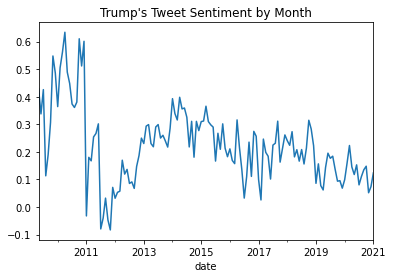

In [33]:
trump_df.resample('M')['sentiment_score'].mean().plot(
    title="Trump's Tweet Sentiment by Month");

We can also `.resample()` by day ('D'), week ('W'), or year ('Y').

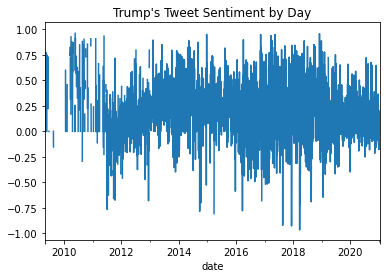

In [34]:
trump_df.resample('D')['sentiment_score'].mean().plot(
    title="Trump's Tweet Sentiment by Day");

By using `.loc`, we can also zoom in on particular time periods, such as the year 2020.

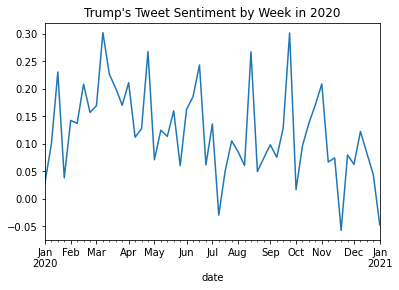

In [35]:
trump_df.loc["2020"].resample('W')['sentiment_score'].mean().plot(title="Trump's Tweet Sentiment by Week in 2020");

Hmm looks like there's a major dip near the end of November 2020...around the same time that Donald Trump was not re-elected for president of the United States.... Let's take a closer look.

In [37]:
trump_df.loc["2020-11-07":"2020-11-30"].sort_values(by='sentiment_score')[:10]

<ipython-input-37-2b4f38b767db>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  trump_df.loc["2020-11-07":"2020-11-30"].sort_values(by='sentiment_score')[:10]


,text,favorites,retweets,sentiment_score
date,,,,
2020-11-18 13:55:00,"Wrong! At first they voted against because there were far more VOTES than PEOPLE (Sad!). Then they were threatened, screamed at and viciously harassed, and were FORCED to change their vote, but then REFUSED, as American patriots, to sign the documents. 71% MESS. Don’t Harass! https://t.co/n5frpesHfD",139281,37876,-0.9762
2020-11-15 22:21:00,"Many of the court cases being filed all over the Country are not ours, but rather those of people that have seen horrible abuses. Our big cases showing the unconstitutionality of the 2020 Election, &amp; the outrage of things that were done to change the outcome, will soon be filed!",343592,72974,-0.9468
2020-11-14 05:21:00,"Top US Pollster and Statistician Richard Baris — People's Pundit — SUSPENDED from Twitter for Reporting on Disputed Election — Political 'WrongThink' Not Allowed https://t.co/uHBZnJJn1I via Said 10,000 DEAD PEOPLE VOTED IN MICHIGAN. When will this RIGGED ELECTION be overturned!",135655,41780,-0.9387
2020-11-22 12:24:00,It’s all about the signatures on the envelopes. Why are the Democrats fighting so hard to hide them. We will find massive numbers of fraudulent ballots. The signatures won’t match. Fight hard Republicans. Don’t let them destroy the evidence! https://t.co/qN2jHGeWEN,155833,38419,-0.9363
2020-11-16 15:29:00,Trump Campaign Rejects Media Reports of Changed Pennsylvania Case https://t.co/VjIhiyB4XK via @BreitbartNews. Just more Fake News. Harassment and exclusion of our Poll Watchers is a big part of our case. Unconstitutional!,122266,29373,-0.9161
2020-11-15 21:36:00,"WATCH: D.C. Cops Direct Trump-Supporters into Gauntlet of Protesters, Do Nothing When They Are Assaulted https://t.co/179yDCbZou via @BreitbartNews. These thugs and lowlifes only stalked and attacked when most of the tens of thousands of people had left town. Ran away earlier!",106849,31579,-0.8955
2020-11-24 12:33:00,"Poll: 79 Percent of Trump Voters Believe ‘Election Was Stolen‘ https://t.co/PmMBmt05AI via @BreitbartNews They are 100% correct, but we are fighting hard. Our big lawsuit, which spells out in great detail all of the ballot fraud and more, will soon be filled. RIGGED ELECTION!",184222,44923,-0.8858
2020-11-22 01:33:00,"This is not at all frivolous. It is brought on behalf of one of the most respected members of the United States Congress who is disgusted, like so many others, by an Election that is a fraudulent mess. Fake ballots, dead people voting, no Republican Poll Watchers allowed, &amp; more! https://t.co/mOGdSOeZW8",119951,28675,-0.8833
2020-11-15 19:20:00,"John Bolton was one of the dumbest people in government that I’ve had the “pleasure” to work with. A sullen, dull and quiet guy, he added nothing to National Security except, “Gee, let’s go to war.” Also, illegally released much Classified Information. A real dope!",355884,61089,-0.8758


Indeed, we can see a lot of negative sentiment expressed about the election, including claims of its fradulence.

## Calculate Sentiment Scores for Little Red Riding Hood

To calculate sentiment scores for the fairy tale "Little Red Cap," we first need to read in the text file.

We're also going to replace line breaks with spaces to because there are line breaks in the middle of sentences.

In [21]:
# Read in text file
text = open("../texts/literature/Grimms-Little-Red-Cap.txt").read()
# Replace line breaks with spaces
text = text.replace('\n', ' ')

### Install and Import NLTK

Next we need to break the text into sentences.

An easy way to break text into sentences, or to "tokenize" them into sentences, is to use [NLTK](https://www.nltk.org/), a Python library for text analysis natural language processing.

In [ ]:
!pip install nltk

Let's import nltk and download the model that will help us get sentences.

In [ ]:
import nltk
nltk.download('punkt')

To break a string into individual sentences, we can use `nltk.sent_tokenize()`

In [24]:
nltk.sent_tokenize(text)

['LITTLE RED-CAP   Once upon a time, there was a sweet little girl, who was loved by every one who looked at her, and most of all by her Grandmother.',
 'There was nothing that she would not have given the child!',
 'Once she gave her a little cap of red velvet, which suited her so well that she would not wear anything else.',
 'So she was always called Little Red-Cap.',
 'One day, her Mother said to her, “Come, Little Red-Cap, here is a piece of cake and a bottle of wine.',
 'Take them to your Grandmother.',
 'She is ill and weak, and they will do her good.',
 'Set out before it gets hot.',
 'Walk nicely and quietly.',
 'Do not run off the path, or you may fall and break the bottle; then your Grandmother will get nothing!',
 'When you go into her room, don’t forget to say ‘Good morning,’ and don’t stop to peep into every corner, before you do it.”  “I’ll take great care,” said Little Red-Cap to her Mother, and gave her hand on it.',
 'The Grandmother lived in the wood, half an hour’s 

To get sentence numbers for each sentence, we can use `enumerate()`.

In [25]:
for number, sentence in enumerate(nltk.sent_tokenize(text)):
    print(number, sentence)

0 LITTLE RED-CAP   Once upon a time, there was a sweet little girl, who was loved by every one who looked at her, and most of all by her Grandmother.
1 There was nothing that she would not have given the child!
2 Once she gave her a little cap of red velvet, which suited her so well that she would not wear anything else.
3 So she was always called Little Red-Cap.
4 One day, her Mother said to her, “Come, Little Red-Cap, here is a piece of cake and a bottle of wine.
5 Take them to your Grandmother.
6 She is ill and weak, and they will do her good.
7 Set out before it gets hot.
8 Walk nicely and quietly.
9 Do not run off the path, or you may fall and break the bottle; then your Grandmother will get nothing!
10 When you go into her room, don’t forget to say ‘Good morning,’ and don’t stop to peep into every corner, before you do it.”  “I’ll take great care,” said Little Red-Cap to her Mother, and gave her hand on it.
11 The Grandmother lived in the wood, half an hour’s distance from the vi

### Make DataFrame

For convenience, we can put all of the sentences into a pandas DataFrame. One easy way to make a DataFrame is to first make a list of dictionaries.

Below we loop through the sentences, calculate sentiment scores, and then create a dictionary with the sentence, sentence numnber, and compound score, which we append to the list `sentence_scores`.

In [26]:
# Break text into sentences
sentences = nltk.sent_tokenize(text)

# Make empty list
sentence_scores = []
# Get each sentence and sentence number, which is what enumerate does
for number, sentence in enumerate(sentences):
    # Use VADER to calculate sentiment
    scores = sentimentAnalyser.polarity_scores(sentence)
    # Make dictionary and append it to the previously empty list
    sentence_scores.append({'sentence': sentence, 'sentence_number': number+1, 'sentiment_score': scores['compound']})

To make this list of dictionaries into a DataFrame, we can simply use `pd.DataFrame()`

In [27]:
pd.DataFrame(sentence_scores)

,sentence,sentence_number,sentiment_score
0,"LITTLE RED-CAP Once upon a time, there was a sweet little girl, who was loved by every one who looked at her, and most of all by her Grandmother.",1,0.7845
1,There was nothing that she would not have given the child!,2,0.0000
2,"Once she gave her a little cap of red velvet, which suited her so well that she would not wear anything else.",3,0.4101
3,So she was always called Little Red-Cap.,4,0.0000
4,"One day, her Mother said to her, “Come, Little Red-Cap, here is a piece of cake and a bottle of wine.",5,0.0000
5,Take them to your Grandmother.,6,0.0000
6,"She is ill and weak, and they will do her good.",7,-0.4215
7,Set out before it gets hot.,8,0.0000
8,Walk nicely and quietly.,9,0.4404
9,"Do not run off the path, or you may fall and break the bottle; then your Grandmother will get nothing!",10,0.0000


Let's examine the 10 most negative sentences.

In [28]:
# Assign DataFrame to variable red_df
red_df = pd.DataFrame(sentence_scores)

# Sort by the column "sentiment_score" and slice for first 10 values
red_df.sort_values(by='sentiment_score')[:10]

,sentence,sentence_number,sentiment_score
52,"And when he awoke, he wanted to run away, but the stones were so heavy that he tumbled down at once, and fell dead.",53,-0.7876
49,"When he had made two snips, he saw the little Red-Cap shining, and then he made two snips more, and the little girl sprang out, crying, “Ah, how frightened I have been!",50,-0.7424
56,"But Red-Cap thought to herself, “As long as I live, I will never leave the path to run into the wood, when my mother has forbidden me to do so.”",57,-0.5389
45,"I must just see if she wants anything.” So he went into the room, and when he came to the bed, he saw the Wolf lying in it.",46,-0.5267
12,"Red-Cap did not know what a wicked creature he was, and was not at all afraid of him.",13,-0.5267
15,"Yesterday was baking-day, so poor sick Grandmother is to have something good, to make her stronger.” “Where does your Grandmother live, Little Red-Cap?” “A good quarter of an hour farther on in the wood.",16,-0.4648
35,"how uneasy I feel to-day, and at other times I like being with Grandmother so much.” She called out, “Good morning,” but received no answer.",36,-0.4310
6,"She is ill and weak, and they will do her good.",7,-0.4215
21,"I believe, too, that you do not hear how sweetly the little birds are singing.",22,-0.3724
32,"When she had gathered so many that she could carry no more, she remembered her Grandmother, and set out on the way to her.",33,-0.2960


Let's examine the 10 most positive sentences.

In [29]:
# Sort by the column "sentiment_score," this time in descending order, and slice for first 10 values
red_df.sort_values(by='sentiment_score', ascending=False)[:10]

,sentence,sentence_number,sentiment_score
41,"“The better to see you with, my dear.” “But, Grandmother, what large hands you have!” “The better to hug you with.” “Oh!",42,0.8585
0,"LITTLE RED-CAP Once upon a time, there was a sweet little girl, who was loved by every one who looked at her, and most of all by her Grandmother.",1,0.7845
19,what a nice plump mouthful--she will be better to eat than the old woman.,20,0.6908
10,"When you go into her room, don’t forget to say ‘Good morning,’ and don’t stop to peep into every corner, before you do it.” “I’ll take great care,” said Little Red-Cap to her Mother, and gave her hand on it.",11,0.6369
51,Red-Cap then quickly fetched great stones with which they filled the Wolf’s body.,52,0.6249
22,"You walk gravely along as if you were going to school, while everything else in the wood is merry.” Little Red-Cap raised her eyes, and when she saw the sunbeams dancing here and there through the trees, and pretty flowers growing everywhere, she thought, “Suppose I take Grandmother a fresh nosegay.",23,0.5719
14,"“Thank you kindly, Wolf.” “Whither away so early, Little Red-Cap?” “To my Grandmother’s.” “What have you got in your apron?” “Cake and wine.",15,0.5514
53,Then all three were delighted.,54,0.5106
55,"The grandmother ate the cake and drank the wine which Red-Cap had brought, and grew strong again.",56,0.5106
39,"Grandmother,” she said, “what big ears you have!” “The better to hear you with, my Child,” was the reply.",40,0.4926


### Make a Sentiment Plot

To create a data visualization of sentiment over the course of "Little Red Cap," we can plot the sentiment scores over story time (aka sentence number).

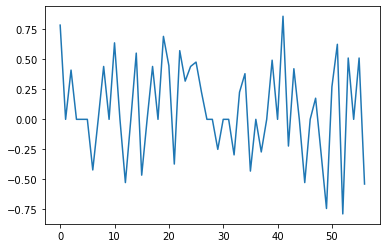

In [38]:
red_df['sentiment_score'].plot();

We can also add a little formatting and styling to make it more readable.

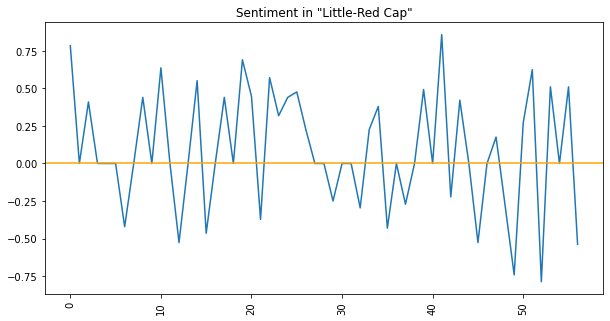

In [39]:
import matplotlib.pyplot as plt

ax = red_df['sentiment_score'].plot(x='sentence_number', y='sentiment_score', kind='line',
                        figsize=(10,5), rot=90, title='Sentiment in "Little-Red Cap"')

# Plot a horizontal line at 0
plt.axhline(y=0, color='orange', linestyle='-');

The plots above show sentiment fluctuating sentence by sentence. But we could also get a more generalized view by getting a "rolling average" 5 sentences at a time (by using the `.rolling()` method with a specified window).

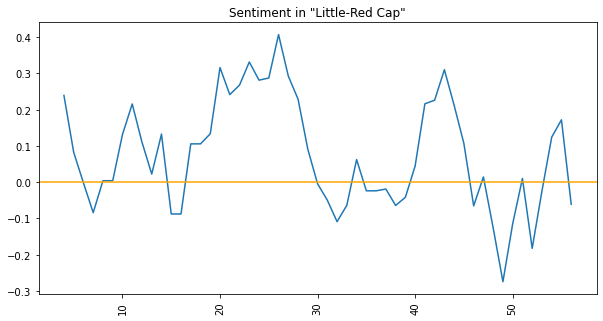

In [40]:
# Get averages for a rolling window, then plot
red_df.rolling(5)['sentiment_score'].mean().plot(x='sentence_number', y='sentiment_score', kind='line',
                        figsize=(10,5), rot=90, title='Sentiment in "Little-Red Cap"')

# Plot a horizontal line at 0
plt.axhline(y=0, color='orange', linestyle='-');

The figure above captures the "plot arc" of "Little Red-Cap" relatively well.

The story arc begins positively with Little Red-Cap, "a sweet little girl...loved by every
one who looked at her," setting off into the woods and picking flowers in the sunshine. Then it dips severely when she gets to her grandmother's home, discovers the wolf in her grandmother's clothing, and gets devoured by the wolf. Finally it picks up again when the huntsman cuts open the wolf's stomach and saves Little Red-Cap and her grandmother, and the wolf ultimately dies.

But it should be noted that this is a short and relatively simple story that has very clearly positive and negative words, and VADER does not work as well for all fictional stories.

There are also some tricky moments in this story that help capture how difficult it is to use technologies like VADER to study plot or emotional arcs in stories. For example, the most negative sentence in the story is the moment when the wolf dies: "And when he awoke, he wanted to run away, but the stones were so heavy that he tumbled down at once, and fell dead." Surely this is a negative moment for the wolf, but is this a negative moment for Little Red-Cap, her grandmother, the huntsman, or the reader? It may actually be one of the most positive and triumphant moments. This contradiction helps demonstrate that fictional texts do not typically express straightforward opinions and attitudes the way a social media post might, and thus students and researchers must be careful, cautious, and deliberate when applying sentiment analysis tools to fiction.

### Your Turn! 

- How well do you think VADER sentiment analysis works with tweets and literary texts?
- How do social media posts and literary texts different in the way they express sentiment? What kinds of tweets or literary texts might pose particular problems for VADER?
- What do you think VADER is really measuring?
- Could you imagine using sentiment analysis in a project? If so, how?